# STA 208: Homework 2 (Do not distribute)

## Due 4/24/19 at midnight

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Consider Poisson model with rate parameter $\lambda$ which has PMF,
$$
p(y|\lambda) = \frac{\lambda^y}{y!} e^{-\lambda},
$$
where $y = 0,1,\ldots$ is some count variable.
In Poison regression, we model $\lambda = e^{\beta^\top x}$ to obtain $p(y | x,\beta)$.

1. Let the loss function for Poisson regression be $\ell_i(\beta) \propto - \log p(y_i | x_i, \beta)$ for a dataset consisting of predictor variables and count values $\{x_i,y_i\}_{i=1}^n$.  Here $\propto$ means that we disregard any additive terms that are not dependent on $\beta$.  Write an expression for $\ell_i$ and derive its gradient. 
### Answer:

<font color=blue>
    $$
    - \log p(y_i | \lambda)=- \log(\frac{\lambda^y_i}{y_i!} e^{-\lambda})=\lambda+\log(y_i!)-y_i\log \lambda
    $$
    $$
    \ell_i(\beta) \propto - \log p(y_i | x_i, \beta)=e^{\beta^\top x_i}+\log(y_i!)-\beta^\top x_i y_i
    $$
    
   The gradient of $\ell_i$ is $\nabla \ell_i (\beta)=(e^{\beta^\top x_i} -y_i) x_i$
    </font>

2. Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.
### Answer:
<font color=blue>
The empirical risk is $R_n(\beta)=\frac 1n \sum_{i=1}^n \ell_i (\beta)$, so the gradient of $R_n(\beta)$ is
    
    $$
    \nabla R_n(\beta)=\frac 1n \sum_{i=1}^n e^{\beta^\top x_i} x_i -y_i x_i
    $$
   
   and the second derivative of $R_n(\beta)$ is 
   
   $$
   \nabla^2 R_n(\beta)=\frac 1n \sum_{i=1}^n e^{\beta^\top x_i} x_i x_i^\top
   $$
   
   which is a positive semi definite matrix. Therefore, the empirical risk $R_n(\beta)$ is a convex function of $\beta$
</font>

3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.
### Answer:
<font color=blue>
    If $\hat \beta$ is the minimizer of $R_n$ and$R_n(\beta)$ is differentiable, we have $\nabla R_n(\hat \beta)=0$. Note that $R_n(\beta)$ is a convex function of $\beta$. 
    
   Thus, the mapping at $\hat \beta$ is
    $$
    F_\eta(\hat \beta) = \hat \beta - \eta \nabla R_n(\hat \beta)=\hat \beta
    $$
   </font>
4. I have a script to simulate from this model below.  Implement the gradient descent algorithm above and show that with enough data (n large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).
### Answer:
<font color=blue>
   
   The "Exercise1_question4_a: Sample_size=1000" graph shows that in the gradient descient algorithm, the mean square error will decrease for each iteration.
   
   The graph titled "Exercise4_question4_b: MSE_vs_SampleSize" below shows that as the sample size increases, the mean square error between the estimated $\hat \beta$ and the true $\beta$ is decreasing with a sharp initial drop between $n=100$ and $n=200$ in particular.
    </font>

In [310]:
import numpy as np
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics
from scipy.linalg import svd
import pandas as pd
import matplotlib.pyplot as plt

In [311]:
## Simulate from the Poisson regression model (use y,X)
np.random.seed(5)
n, p = 1000,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
lamb = np.exp(X @ beta)
y = np.random.poisson(lamb)


In [312]:
def gradient(beta,X,y):
    ell=1/n*X.T@(np.exp(X@beta)-y)
    return ell

In [313]:
def beta_h(beta_ini,eta,X,y):
    err=[]
    t=0
    betah=beta_ini-eta*gradient(beta_ini,X,y)
    e=sum((betah-beta_ini)**2)
    while e>10**(-10):
        beta_ini=betah
        betah=beta_ini-eta*gradient(beta_ini,X,y)
        e=sum((betah-beta_ini)**2)
        err_t=np.linalg.norm(betah-beta)
        err.append(err_t)
        t+=1
    return betah, err,t

In [314]:
beta_intial=np.zeros(p)
betah,errlist,t=beta_h(beta_intial,0.001,X,y)
betah

array([-0.02740851,  0.08768646,  0.1113959 , -0.20171071, -0.13481785,
        0.23999194, -0.16702383, -0.05819733, -0.13101687,  0.04633757,
        0.35700308, -0.21006021,  0.21900989,  0.04196016, -0.11379937,
       -0.36396905,  0.0465345 ,  0.10394091, -0.13083864,  0.07178126])

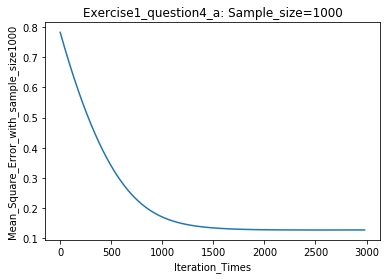

In [315]:
plt.plot(errlist)
plt.xlabel('Iteration_Times')
plt.ylabel('Mean_Square_Error_with_sample_size1000')
plt.title('Exercise1_question4_a: Sample_size=1000');

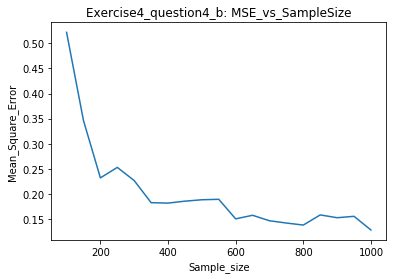

In [316]:
errl=[]
for i in np.arange(100,1001,50):
    beta_intial=np.zeros(p)
    betai,errlisti,ti=beta_h(beta_intial,0.01,X[range(i),:],y[range(i)])
    errl.append(errlisti[-1])
plt.plot(np.arange(100,1001,50),errl)
plt.xlabel('Sample_size')
plt.ylabel('Mean_Square_Error')
plt.title('Exercise4_question4_b: MSE_vs_SampleSize');

__Exercise 2__ (30 pts)

Recall the subset selection problem with tuning parameter $k$,
$$
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2,
$$
where 
${\rm supp}(\beta) = \{j = 1\,\ldots,p : \beta_j \ne 0 \}$. Notice that we can write this as 
$$
\min_{\beta : \| \beta \|_0 \le k}\| y - X \beta \|_2^2,
$$
where 
1. Write the subset selection problem in the following form
$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$
where $P_S$ is a projection.  Describe the subspace that is the range of this projection.

### Answer:

<font color=blue>
    Assume that S is a specific subset of $\{1,\ldots,p\}$ and $|S|\le k$, and $\beta_s \in \mathbb R^s$, then the OLS of $\beta_s$ is $\hat \beta_s =(X_s^\top X_s)^{-1}X_s^\top y$ and the sum of square error is
    $$
    \| y - X_s \hat \beta_s \|_2^2=\| y - X_s (X_s^\top X_s)^{-1}X_s^\top y \|_2^2=y^\top(I-H_s)y
    $$
   
   where $X_s$ is the subset of columns of $X$ and $H_s$ is $X_s (X_s^\top X_s)^{-1}X_s^\top$. 
   
   Denote $I-H_s$ by $P_s$. Since $H_s$ is projection matrix, then $P_s$ is also projection matrix:
   
   (1) $P_s^\top = (I- H_s)^\top =I^\top- H_s^\top= I- H_s = P_s$
   
   (2) $P_s^2 = (I- H_s)(I- H_s)= (I- 2H_s+H_s^2) = I-2H_s+H_s=I-H_s=P_s$
   
   Note that $\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2$ is to find the best subset to minimize the sum of square error, so this is equivalent to 
   
   $$
   \min_{S \subseteq \{1,\ldots,p\}, |S|\le k} \| y - X_s \hat \beta_s \|_2^2=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top(I-H_s)y=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_s y
   $$
   
   $P_s$ is the orthogonal subspace of the coloumn space of $X_s$
   </font>
2. Suppose that we have a nested sequence of models $S_1\subset S_2 \subset \ldots \subset S_p$ such that $|S_k| = k$ (it contains $k$ variables).  Prove that $$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$ for $k=1,\ldots,p-1$.  What does this tell us about the solution to the subset selection problem and the constraint $|S| \le k$?

### Answer:
<font color=blue>

  - In linear regression, the sum of square error $SSE_k$ based on k predictors:$(x_{s_1},x_{s_2},\dots,x_{s_k})$ must be larger than or equal to the sum of square error $SSE_{k+1}$ based on one more predictor $x_{s_{k+1}}$, where $(x_{s_1},x_{s_2},\dots,x_{s_k}) \subset (x_{s_1},x_{s_2},\dots,x_{s_k},x_{s_{k+1}})$. Note that the $SSE_k$ can be regarded as the 2-norm of the residual of y after prejection to the column space of $(x_{s_1},x_{s_2},\dots,x_{s_k})$. Therefore,
  $$
  SSE_k=y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y=SSE_{k+1}
  $$
  
  - From another perspective, by the above question, we know that
  $$
  y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y \Longleftrightarrow \min_{\beta_{k}}\| y - X_{S_k} \beta_{k} \|_2^2 \ge \min_{\beta_{k+1}}\| y - X_{S_{k+1}} \beta_{k+1} \|_2^2
  $$ 
  
  Assume that $\hat\beta_{k+1}$ is the solution of $arg\min_{\beta_{k+1}}\| y - X_{S_{k+1}} \beta_{k+1} \|_2^2$, which means for all $\beta_{k+1}$, we have
  $$
  \| y - X_{S_{k+1}} \hat\beta_{k+1} \|_2^2 \le \| y - X_{S_{k+1}} \beta_{k+1} \|_2^2
  $$
  
  Without lack of generality, we assume that $X_{S_{k+1}}=(X_{S_k},x_{k+1})$ and $\beta_{k+1}^*=(\beta_k,0)^\top$ for $\forall \beta_k \in \mathbb {R^k}$. Then we have
  $$
  \| y - X_{S_{k+1}} \hat\beta_{k+1} \|_2^2 \le \| y - X_{S_k} \beta_k \|_2^2, \forall \beta_k \in \mathbb {R^k}
  $$
  
  Therefore, 
  $$
  \| y - X_{S_{k+1}} \hat\beta_{k+1} \|_2^2 =\min_{\beta_{k+1}}\| y - X_{S_{k+1}} \beta_{k+1} \|_2^2 \le \min_{\beta_{k}}\| y - X_{S_k} \beta_{k} \|_2^2
  $$
  
  Conclude $y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$.

Based on the above conclusion, in the subset selection with constrain $|S| \le k$, we always tend to select the best subset with size k, which is $|{\rm supp}(\hat\beta)| = k$, since $y^\top P_{S_{k-1}} y \ge y^\top P_{S_{k}} y$
   </font>
3. Suppose that $X$ is orthogonal, then write a computationally efficient pseudocode to solve the subset selection problem.  Prove that it is correct (your algorithm actually solves subset selection under othogonal design).
### Answer:
<font color=blue>
   
  - Pseudocode
  
  The computationally efficient method is
  
  Step1: Calculate inner product of each column vector of $x_j$ with $y$ 
  Step2: Sort the inner product values in decreasing order
  Step3: Choose the $k$ columns corresponding to the $k$ largest inner product values. 
  
  The pseudocode is:
   
   Innerproduct=[]
   
  for i in range(p):
   > Innerproduct_j=np.dot(y,x_j)
    
   > Innerproduct.append(Innerproduct_j) 
  order=np.argsort(Innerproduct)
  
  Finally, choose the first k indices $(s_1,s_2,\dots,s_k)$ as the best k subset. And then fit the model with design matrix $X_k=(x_{s_1},x_{s_2},\dots,x_{s_k})$.
   
  - Proof
  
   (1) Consider p simple linear regression $y=\beta_jx_j$ for each $j\in(1,2,\dots,p)$. We know that $R_j^2$ is the correlation coefficient in simple linear regression and $R_j^2=\frac {SSR_j} {SSE_j}=\frac {SSTO} {SSE_j} -1$. So the larger the $R_j^2$, the smaller the $SSE_j$. Since $X$ is orthogonal, the $SSR_j$ is independent(additive). So, in order to find the best subset of size k, we can choose k columns of $X$ corresponding to the k largest $R^2$. 
   
   (2) From another perspective, based on the above conclusion, the subset selection problem is equivalent to
   $$
   \min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_s y=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top (I-X_s (X_s^\top X_s)^{-1}X_s^\top) y=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top (I-X_s X_s^\top) y=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top y-y^\top X_s X_s^\top y
   $$
   
   which is equivalent to $\max_{S \subseteq \{1,\ldots,p\}, |S|\le k} \|X_s^\top y\|_2^2$. therefore the best subset should be $S_s=(s_1,\dots,s_k)$ corresponding to the k columns of X such that $x_{s_j}^\top y$ are the k largest values among $(x_1^\top y,\dots, x_p^\top y)$
  
   </font>
  
4. (Challenge) Suppose that we have that $n = p$ and $y_i = \beta_i + \epsilon_i$ (identity design matrix) where $\epsilon_i$ satisfies 
$$
\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}
$$
for any $t > 0$ (this is true for central Normal RVs) for some $\sigma > 0$.
Suppose that there is some true $S_0 \subset\{1,\ldots,p\}$ such that $|S_0| = k < p$ and ${\rm supp}(\beta) = S_0$.
Prove the following.

__Proposition__
Define $\mu = \min_{j \in S_0} |\beta_j|$ and call $\mu / \sigma$ the signal-to-noise ratio.  Then if 
$$
\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)},
$$
then the true $S$ is selected by subset selection with probability at least $1 - \delta$.

Hint: rewrite the subset selection problem with $X = I$ and compare the objective at $S_0$ to any other $S$.

### Answer:
<font color=blue>
    
Based on above conclusion, we want to find $S$ such that $\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_k y$, where $P_k=I-X_k (X_k^\top X_k)^{-1}X_k^\top$. So, we have

$$
\min_{|S|\le k}y^\top (I-X_ (X_k^\top X_k)^{-1}X_k^\top) y=\min_{|S|\le k}y^\top y-y^\top X_k X_k^\top y
$$

note that $X_k$ is identity matrix. This is equivalent to maximize $\|X_k^\top y\|_2^2$. Thus, the subset $S=(k_1,k_2,\dots,k_k)$ should correspond to the k largest elements of $(|y_1|,|y_2|,\dots,|y_n|)$. The probability of selecting the true $S$ is 

$$
P(\min(|y_{k_1}|,|y_{k_2}|,\dots,|y_{k_k}|)\ge\max(|y_{k_{k+1}}|,|y_{k_{k+2}}|,\dots,|y_{k_n}|))
$$

The worst case is that $\min(|y_{k_1}|,|y_{k_2}|,\dots,|y_{k_k}|)$ is very closed to $\max(|y_{k_{k+1}}|,|y_{k_{k+2}}|,\dots,|y_{k_n}|)$. Besides, besed on the proposition $\mu = \min_{j \in S_0} |\beta_j|$ and the true $S_0 \subset\{1,\ldots,p\}$ such that $|S_0| = k$, we have $y_i\le -\mu+\epsilon_j$ or $y_j\ge \mu+\epsilon_j$,$j\in S_0$, and $ y_j=\epsilon_j$,$j\not\in S_0$. So when $|\epsilon_j|=\frac \mu 2$, $\min(|y_{k_1}|,|y_{k_2}|,\dots,|y_{k_k}|)$ is very closed to $\max(|y_{k_{k+1}}|,|y_{k_{k+2}}|,\dots,|y_{k_n}|)$ which is the worst case. Thus, the probability of selecting the true $S$ is 

$$
P(\min(|y_{k_1}|,|y_{k_2}|,\dots,|y_{k_k}|)\ge\max(|y_{k_{k+1}}|,|y_{k_{k+2}}|,\dots,|y_{k_n}|))\ge P(\forall |\epsilon_j |\le \frac \mu2)=1-P(\exists |\epsilon_j| \ge \frac \mu 2)\ge 1-nP(|\epsilon_j| \ge \frac \mu 2)\ge 1-2n e^{-(\frac \mu 2)^2 / 2\sigma^2}
$$

If $\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)}$, we have

$$
\frac{\mu^2}{\sigma^2} > 8 \log \left( \frac{2n}{\delta}\right) \rightarrow e^{\frac{\mu^2}{8\sigma^2}} > \frac{2n}{\delta} \rightarrow 2n e^{-\frac{\mu^2}{8\sigma^2}} < \delta \rightarrow 1-2n e^{-\frac{\mu^2}{8\sigma^2}} > 1- \delta
$$

Therefore the probability of selecting the true $S$ is at least $1- \delta$.
</font>

__Exercise 3__ (40 pts)
For this exercise, it may be helpful to use the `sklearn.linear_model` module.  I have also included a plotting tool for making the lasso path in ESL.

1. Load the training and test data using the script below.  Fit OLS on the training dataset and compute the test error.  Throughout you do not need to compute an intercept but you should normalize the X (divide by the column norms).
### Answer:
<font color=blue>
    The test error is about 1.04
    </font>
    
2. Train and tune ridge regression using a validation set and compute the test error (square error loss).
### Answer:
<font color=blue>
   Based on the graph titled "Exercise3_question2: Tuning_alpha", the test error on validation data set is minimum, when the parameter is approximately 0.00142. Use $\alpha=0.00142$ to fit the ridge regression model on the training data, and the test error is about 1.038.
    </font>

3. Fit the lasso path with lars to the data and compute the test error for each returned lasso coefficient.
### Answer:
<font color=blue>
   The graph "Exercise3_question3: Subset_vs_LassoMSE" illustrates the test error for each returned lasso coefficient, and it turns out that when the subset size is 69, the MSE is minimum.
    </font>


4. Perform 3 without the lasso modification generating the lars path.  Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.
### Answer:  
<font color=blue>
    In lars path without lasso modification, once the element is added, it will remain in the model and cannot be dropped in the future. While, for lasso path, the added elements can be dropped as lambda decreases, even it can be added and dropped more than one time.
    
   These two graphs show similar pattern, but the element corresponding to the red line have a little difference performance. It is added at almost the same time in lasso path and lars path. But after that, in lasso path it is dropped and added again finally. By contrast, in lars path, it remains and the coefficient chages passing throng the x-axis.
   </font>


5. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.
### Answer:
 <font color=blue>
    The graph "Exercise3_question5: MES_OLS_ActiveSet" shows that as the active set becomes larger, the restricted OLS test error is sharply decreasing initially, then except a slight increase between 4 and 15, it slowly decreases untill attaining the minimum OLS test error at size 20, after that it slightly increases again.
    </font>
    
    
6. If your boss said that they wanted a more parsimonious model (a smaller model) then which model would you choose, justify your answer.  Under which circumstance would you choose the model with the smallest test error.
### Answer:
<font color=blue>
    Based on the above discussion, the model containing 4 predictors, which is $(x_1, x_4,  x_6, x_ 9)$ may be more parsimonious.
    
   When we have a large data sample or collecting data from all those predictor variables (less missing values) is not too costy, and the model with the smallest test error dominates other smaller model (the test loss of other smaller model is significantly larger), we may choose the model with the smallest test error. 
    </font>
    

In [317]:
def plot_lars(coefs, lines=False, title="Lars Path"):
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    xx = np.sum(np.abs(coefs.T), axis=1)# the L1 norm of beta vector with different lambda
    xx /= xx[-1] # |coef| / max|coef|
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines: # what does this condition mean?
        plt.vlines(xx, ymin, ymax, linestyle='dashed') # hit event?
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')

In [318]:
import pickle
with open('hw2.data','rb') as f:
    y_tr,X_tr,y_te,X_te = pickle.load(f)

In [319]:
y_tr.shape
y_te.shape
n,p=X_tr.shape

In [320]:
#normalize the data
X_tr_norm=preprocessing.normalize(X_tr,axis=0)
X_te_norm=preprocessing.normalize(X_te,axis=0)


In [321]:
# OlS and MSE
lr = linear_model.LinearRegression()
lr.fit(X_tr_norm,y_tr)
lr_pred=lr.predict(X_te_norm)
lr_mse=metrics.mean_squared_error(y_te,lr_pred)
lr_mse

1.040367542175763

In [322]:
# Validation set
test_size = .33
X_tu, X_val, y_tu, y_val = model_selection.train_test_split(X_tr_norm,y_tr,test_size = .33,random_state=1)


Text(0.5, 1.0, 'Exercise3_question2: Tuning_alpha')

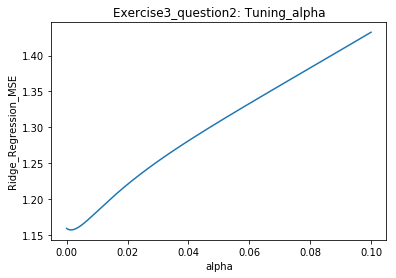

In [323]:
# Tune Ridge parameter
Rdg_mse=[]
lamb_range=np.arange(0,0.1,0.00001)
for lamb in lamb_range:
    rdg=linear_model.Ridge(alpha=lamb)
    rdg.fit(X_tu,y_tu)
    rdg_pred=rdg.predict(X_val)
    mse=metrics.mean_squared_error(y_val,rdg_pred)
    Rdg_mse.append(mse)
plt.plot(lamb_range,Rdg_mse)
plt.xlabel('alpha')
plt.ylabel('Ridge_Regression_MSE')
plt.title('Exercise3_question2: Tuning_alpha')

In [325]:
rdg=linear_model.Ridge(alpha=lamb_range[np.argmin(Rdg_mse)])
rdg.fit(X_tr_norm,y_tr)
rdg_pred=rdg.predict(X_te_norm)
mse=metrics.mean_squared_error(y_te,rdg_pred)
mse

1.038844767911634

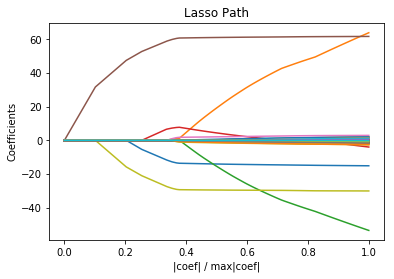

In [326]:
##Exercise_3,3:lasso path
lassoper = linear_model.lars_path(X_tr_norm,y_tr,method="lasso")
plot_lars(lassoper[2], lines=False, title="Lasso Path")


Text(0.5, 1.0, 'Exercise3_question3: Subset_vs_LassoMSE')

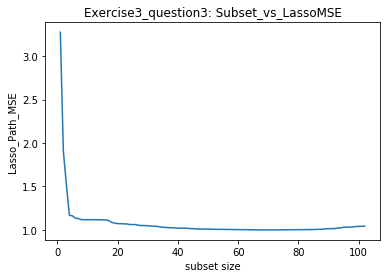

In [327]:
fit_value=X_te_norm@lassoper[2]
p,k=lassoper[2].shape
mse=[metrics.mean_squared_error(y_te,fit_value[:,i]) for i in range(1,k)]
#the test error(mean square error) for each returned lasso coefficient
plt.plot(range(1,k),mse)
plt.xlabel('subset size')
plt.ylabel('Lasso_Path_MSE')
plt.title('Exercise3_question3: Subset_vs_LassoMSE')

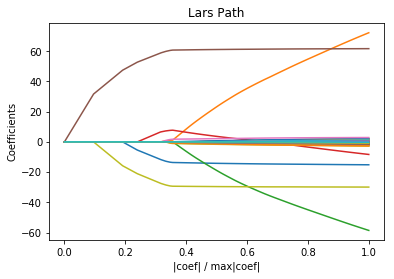

In [328]:
## without lasso modification: lar path
larsper = linear_model.lars_path(X_tr_norm,y_tr,method='lar')
plot_lars(larsper[2], lines=False, title="Lars Path")

Text(0, 0.5, 'Activate_Set_MSE')

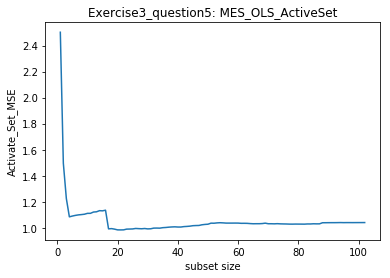

In [329]:
#Exercise_3,4: Recompute OLS for each active set
act_index=[]
act_mse=[]
for i in range(1,k):
    act_ind=np.where(lassoper[2][:,i])[0]
    act_index.append(act_ind)
    X_tr_act=X_tr_norm[:,act_ind]
    X_te_act=X_te_norm[:,act_ind]
    lr=linear_model.LinearRegression()
    lr_fit = lr.fit(X_tr_act,y_tr)
    lr_pred=lr.predict(X_te_act)
    lr_mse=metrics.mean_squared_error(y_te,lr_pred)
    act_mse.append(lr_mse)

plt.plot(range(1,k),act_mse)
plt.title('Exercise3_question5: MES_OLS_ActiveSet');
plt.xlabel('subset size')
plt.ylabel('Activate_Set_MSE')